In [42]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import decomposition

# Read and Explore Data

In [22]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [24]:
df.info()
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


### Understanding output distribution

In [26]:
df['median_house_value'].describe()

count     17000.000000
mean     207300.912353
std      115983.764387
min       14999.000000
25%      119400.000000
50%      180400.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64

(array([ 731., 2958., 3362., 3127., 2291., 1426., 1036.,  629.,  395.,
        1045.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <a list of 10 Patch objects>)

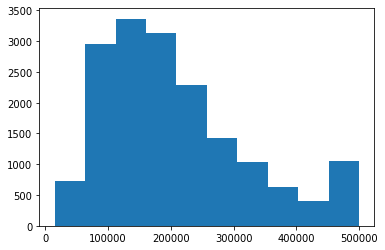

In [27]:
plt.hist(df['median_house_value'],bins=10)
# Majority of output points are distributed between 50K - 250K

### Checking feature impact on output

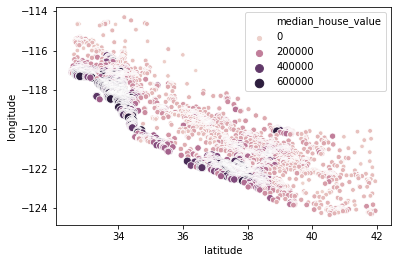

In [30]:
# Distribution of house price based on location of house
sns.scatterplot(x='latitude',y='longitude',hue='median_house_value',data=df, size='median_house_value')

### Analysing feature correlations

In [32]:
# Find the correlation inbetween columns
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


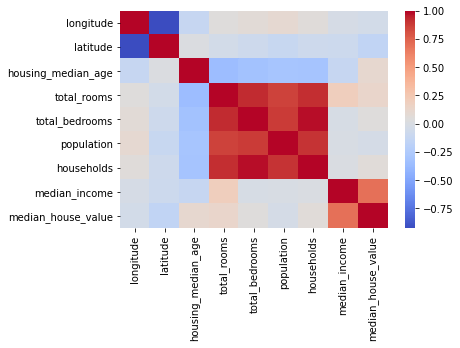

In [33]:
sns.heatmap(df.corr(),cmap='coolwarm')

Based on the correlation, we see that
1. total_rooms and total_bedrooms are highly correlelated and we should only keep 1 of them. total_rooms has more impact on the output "medial_house_value" hence lets keep that column


# Data Cleaning

In [34]:
df.drop(['total_bedrooms'],axis=1,inplace=True)

In [46]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype='object')

### Scaling the input

In [47]:
ss = StandardScaler()

In [48]:
x = ss.fit_transform(df.drop('median_house_value',axis=1))

In [49]:
#x = df.to_numpy()
#x = x[:,:-1]
x.shape

(17000, 7)

In [50]:
y = df['median_house_value']

In [51]:
y = y.to_numpy()

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [53]:
print(f'Training data set x is of size {x_train.shape}')
print(f'Training data set y is of size {y_train.shape}')
print(f'Testing data set x is of sixze {x_test.shape}')
print(f'Testing data set y is of size {y_test.shape}')

Training data set x is of size (11900, 7)
Training data set y is of size (11900,)
Testing data set x is of sixze (5100, 7)
Testing data set y is of size (5100,)


# Deep Learning using Keras

### Model configuration

In [54]:
seq_model = keras.Sequential()
seq_model.add(keras.layers.Dense(7,input_shape=(7,),activation='relu'))
seq_model.add(keras.layers.Dense(4, activation='relu'))
seq_model.add(keras.layers.Dense(2,activation='relu'))
#seq_model.add(keras.layers.Dense(4))
seq_model.add(keras.layers.Dense(1,activation='relu'))

In [55]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [56]:
seq_model.compile(optimizer='adam',loss='mse')

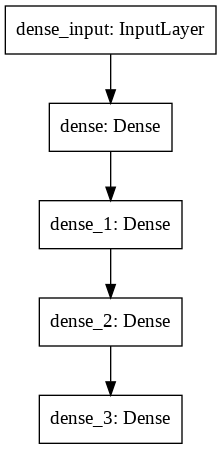

In [57]:
from keras.utils import plot_model
plot_model(seq_model)

In [58]:
#type(y_train)
#type(x_train)

### Training the model

In [59]:
history = seq_model.fit(x_train,y_train,epochs=200,validation_data=(x_test, y_test))

Epoch 1/200
372/372 [==============================] - 1s 1ms/step - loss: 56801992704.0000 - val_loss: 55535362048.0000
Epoch 2/200
372/372 [==============================] - 0s 1ms/step - loss: 56767651840.0000 - val_loss: 55451881472.0000
Epoch 3/200
372/372 [==============================] - 0s 1ms/step - loss: 56571273216.0000 - val_loss: 55118614528.0000
Epoch 4/200
372/372 [==============================] - 0s 1ms/step - loss: 56020602880.0000 - val_loss: 54342529024.0000
Epoch 5/200
372/372 [==============================] - 0s 1ms/step - loss: 54916771840.0000 - val_loss: 52937351168.0000
Epoch 6/200
372/372 [==============================] - 0s 1ms/step - loss: 53094277120.0000 - val_loss: 50759757824.0000
Epoch 7/200
372/372 [==============================] - 0s 1ms/step - loss: 50448564224.0000 - val_loss: 47758819328.0000
Epoch 8/200
372/372 [==============================] - 0s 1ms/step - loss: 46945939456.0000 - val_loss: 43923046400.0000
Epoch 9/200
372/372 [===========

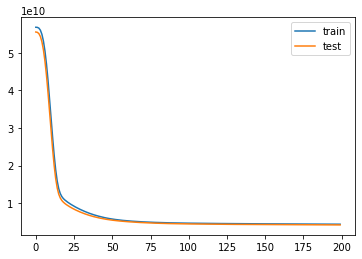

In [64]:
train_acc = seq_model.evaluate(x_train, y_train, verbose=0)
test_acc = seq_model.evaluate(x_test, y_test, verbose=0)
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# Initial epochs have major drop in loss after the graph elbow point, not much 
# loss is reduced.
# Optimum epochs recommended based on this observation is 100

### Prediction

In [65]:
predictions = seq_model.predict(x_test)

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(y_test,predictions)
#Previous best - 58785.43664368873

46626.89350921033

In [67]:
actual = pd.DataFrame(y_test)

In [88]:
 pred_y = predictions.reshape((5100,))
 error = y_test - pred_y

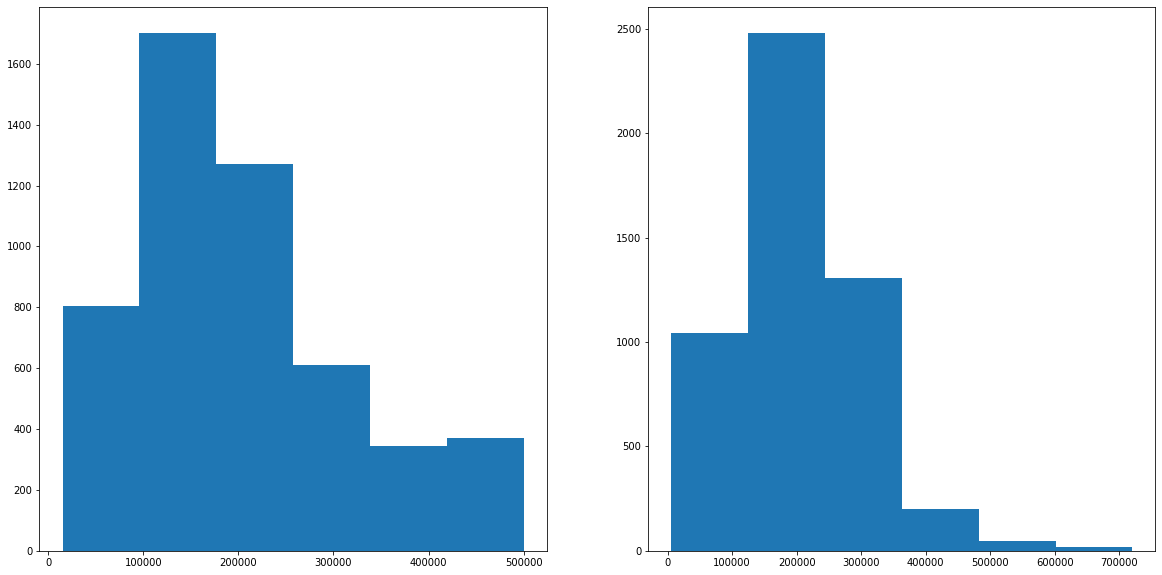

In [100]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(y_test,bins=6)
plt.title = 'Test Value'
plt.subplot(1,2,2)
plt.hist(pred_y,bins=6)
plt.title = 'Predicted'